In [1266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 

In [1267]:
df_clean= pd.read_csv('cleaned_data.csv')


/var/folders/87/8lkk6ykj1_74chh73s5bkg8r0000gn/T/ipykernel_63108/3521527592.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clean= pd.read_csv('cleaned_data.csv')


In [1268]:
df_clean.columns


Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'Variation',
       'visitor_id', 'visit_id', 'process_step', 'date_time'],
      dtype='object')

In [1269]:
df_clean = df_clean.rename(columns={'Variation': 'variation'})

In [1270]:
df_clean.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'variation',
       'visitor_id', 'visit_id', 'process_step', 'date_time'],
      dtype='object')

In [1271]:
df_clean.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
variation            object
visitor_id           object
visit_id             object
process_step         object
date_time            object
dtype: object

In [1272]:
df_clean.size

6214558

In [1273]:
df_clean.tail()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation,visitor_id,visit_id,process_step,date_time
443892,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,NaN,962766819_57063135389,158544612_4105226940_43043,confirm,2017-04-05 11:48:02
443893,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,NaN,962766819_57063135389,158544612_4105226940_43043,step_3,2017-04-05 11:44:07
443894,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,NaN,962766819_57063135389,158544612_4105226940_43043,step_2,2017-04-05 11:43:10
443895,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,NaN,962766819_57063135389,884309593_49820690623_654151,step_1,2017-04-05 11:41:32
443896,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,NaN,962766819_57063135389,884309593_49820690623_654151,start,2017-04-05 11:41:04


In [1274]:
df_clean.shape


(443897, 14)

In [1275]:
#df_clean.info()

In [1276]:
df_clean.duplicated().sum()

0

In [1277]:
df_clean = df_clean.drop_duplicates(subset=['client_id'], keep='first')

In [1278]:
df_clean.shape

(70609, 14)

## droping missing values

In [1280]:
df_clean.isnull().sum()

client_id               0
clnt_tenure_yr         14
clnt_tenure_mnth       14
clnt_age               15
gendr                  14
num_accts              14
bal                    14
calls_6_mnth           14
logons_6_mnth          14
variation           20109
visitor_id              0
visit_id                0
process_step            0
date_time               0
dtype: int64

In [1281]:
#df_clean["clnt_tenure_yr"].unique()

In [1282]:
#df_clean["clnt_tenure_yr"].isnull().sum()

In [1283]:
#cleaning lot of missing values
df_clean = df_clean.dropna()
df_clean.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
variation           0
visitor_id          0
visit_id            0
process_step        0
date_time           0
dtype: int64

In [1284]:
df_clean["bal"].unique()

array([ 45105.3 , 110860.3 ,  52467.79, ...,  44837.16,  44994.24,
       209278.15])

## Rounded numbers in bal column


In [1286]:
# rounded numbers in balance
df_clean["bal"]= df_clean["bal"].round(2)


In [1287]:
df_clean.loc[:, "bal"] = df_clean["bal"].round(2)


In [1288]:
df_clean["bal"]

0           45105.30
11         110860.30
17          52467.79
22          67454.65
23         103671.75
             ...    
317197     372100.59
317209    4279873.38
317214      44837.16
317224      44994.24
317229     209278.15
Name: bal, Length: 50487, dtype: float64

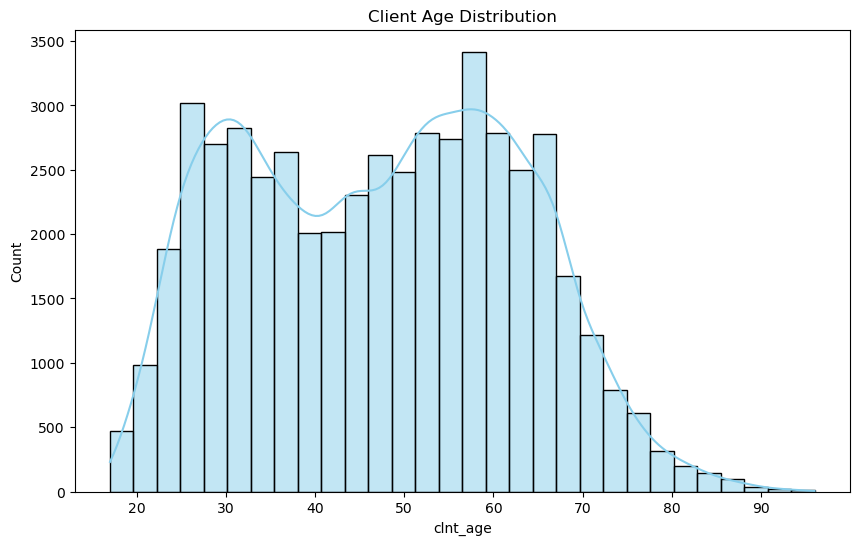

In [1289]:
plt.figure(figsize=(10, 6))  
sns.histplot(df_clean['clnt_age'], bins=30, kde=True, color='skyblue')
plt.title("Client Age Distribution")
plt.savefig('Client_age_distribution.png')
plt.show()



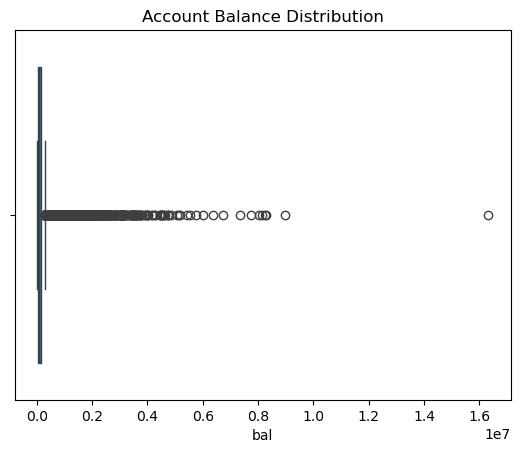

In [1290]:
# Account balance distribution
sns.boxplot(x='bal', data=df_clean)
plt.title('Account Balance Distribution')
plt.show()

# Completion rate updated


In [1292]:
df_clean[df_clean['variation'] == 'Test'].shape[0]

26961

In [1293]:
df_clean[df_clean['variation'] == 'Control'].shape[0]

23526

In [1294]:
test_group = df_clean[df_clean['variation'] == 'Test']
control_group = df_clean[df_clean['variation'] == 'Control']

In [1295]:
test_completion = test_group[test_group['process_step'] == 'confirm'].shape[0]
test_completion

16102

In [1296]:
control_completion = control_group[control_group['process_step'] == 'confirm'].shape[0]
control_completion 

12027

In [1297]:
# Calculate completion rate for the Test group
test_completion = test_group[test_group['process_step'] == 'confirm'].shape[0] / test_group.shape[0]

# Calculate completion rate for the Control group
control_completion = control_group[control_group['process_step'] == 'confirm'].shape[0] / control_group.shape[0]

print(f'Test Group Completion Rate: {test_completion:.2f}')
print(f'Control Group Completion Rate: {control_completion:.2f}')


Test Group Completion Rate: 0.60
Control Group Completion Rate: 0.51


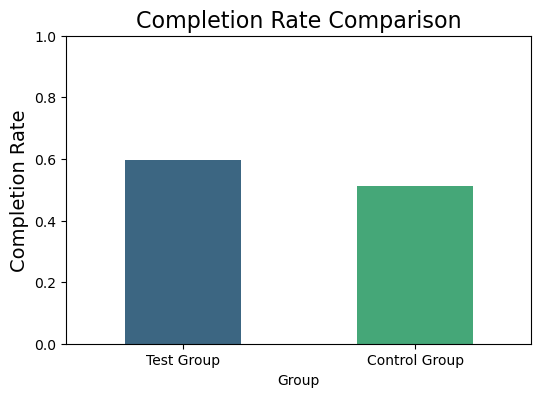

In [1298]:
completion_data = {
    'Group': ['Test Group', 'Control Group'],
    'Completion Rate': [test_completion, control_completion]
}

completion_df = pd.DataFrame(completion_data)
plt.figure(figsize=(6, 4))
sns.barplot(x='Group', y='Completion Rate', data=completion_df, hue='Group', palette='viridis', width=0.5)

# Add titles and labels
plt.title('Completion Rate Comparison', fontsize=16)
plt.ylabel('Completion Rate', fontsize=14)
#plt.xlabel('Group', fontsize=14)
plt.ylim(0, 1)  # Set y-axis to range from 0 to 1 for better visualization



plt.savefig('completion_rate_comparison_updated.png', format='png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [1299]:
completion_rate_diff = test_completion - control_completion
print(f'Completion Rate Difference: {completion_rate_diff:.2f}')

Completion Rate Difference: 0.09


In [1300]:
from statsmodels.stats.proportion import proportions_ztest

# data for hypothesis testing
successes = [test_group[test_group['process_step'] == 'confirm'].shape[0], 
             control_group[control_group['process_step'] == 'confirm'].shape[0]]
totals = [test_group.shape[0], control_group.shape[0]]

# Perform Z-test
stat, p_value = proportions_ztest(successes, totals)
print(f'Z-statistic: {stat:.2f}, P-value: {p_value:.2f}')

Z-statistic: 19.41, P-value: 0.00


If the p-value is less than your chosen significance level (typically 0.05), you reject the null hypothesis and conclude that the difference in completion rates is statistically significant.
If the p-value is greater than 0.05, you fail to reject the null hypothesis, meaning the difference is not statistically significant.

Hypotheses: Null Hypothesis (H₀): There is no difference in completion rates between the Test and Control groups. (i.e., the completion rate in the Test group is equal to the Control group)

Alternative Hypothesis (H₁): There is a significant difference in completion rates between the Test and Control groups. (i.e., the completion rate in the Test group is higher than the Control group)

If the p-value is less than 0.05, we reject the null hypothesis, meaning there is a statistically significant difference between the completion rates of the Test and Control groups. If the p-value is greater than 0.05, we fail to reject the null hypothesis, meaning there is no statistically significant difference.

In [1303]:
results = {
    'Group': ['Test Group', 'Control Group'],
    'Completion Rate': [test_completion, control_completion],
    'Completion Rate Difference': [completion_rate_diff, None],  # NaN for Control Group as it's the baseline
    'Z-Statistic': [stat, None],  # Z-Statistic applies to test group, leave None for control
    'P-Value': [p_value, None]    # P-Value applies to test group, leave None for control
}

# Create a DataFrame
df_results = pd.DataFrame(results)

# Save the DataFrame to a CSV file
df_results.to_csv('completion_rate_analysis.csv', index=False)

print("CSV file created successfully: 'completion_rate_analysis.csv'")

CSV file created successfully: 'completion_rate_analysis.csv'


In [1304]:
######time spent on each step

In [1305]:
# Convert 'date_time' to datetime format
df_clean['date_time'] = pd.to_datetime(df_clean['date_time'], errors='coerce')
#Sort the data by 'visit_id' and 'date_time' to ensure correct time sequence
df_clean = df_clean.sort_values(by=['visit_id', 'date_time'])


df_clean['time_spent'] = df_clean.groupby('visit_id')['date_time'].diff().dt.total_seconds()
avg_time_per_step = df_clean.groupby('process_step')['time_spent'].mean()

print(avg_time_per_step)

process_step
confirm     654.222930
start       705.300000
step_1      353.444444
step_2      571.200000
step_3     1832.000000
Name: time_spent, dtype: float64


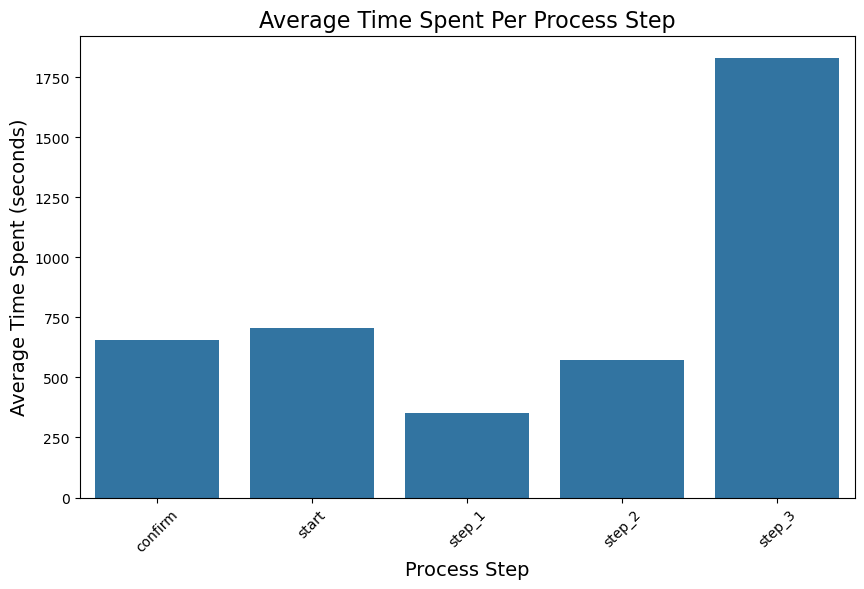

In [1306]:
plt.figure(figsize=(10, 6))  
sns.barplot(x=avg_time_per_step.index, y=avg_time_per_step.values);

# Adding labels and title
plt.title('Average Time Spent Per Process Step', fontsize=16);
plt.xlabel('Process Step', fontsize=14);
plt.ylabel('Average Time Spent (seconds)', fontsize=14);
plt.xticks(rotation=45);

plt.savefig('Average_time_spent_per_process_step.png')

plt.show()

In [1307]:
# Convert 'date_time' to datetime format if not already done
df_clean['date_time'] = pd.to_datetime(df_clean['date_time'])

# Calculate time difference between consecutive steps for each user
df_clean['time_diff'] = df_clean.groupby('visitor_id')['date_time'].diff()

# Inspect the results
print(df_clean[['visitor_id', 'process_step', 'time_diff']].head())


                   visitor_id process_step time_diff
76879   612065484_94198474375      confirm       NaT
251784  754122351_18568832435      confirm       NaT
148160  676020267_36602664238        start       NaT
137001  611052344_43146965242       step_3       NaT
255010  194422203_56127484794      confirm       NaT


In [1308]:
# Calculate average time spent on each step for both groups
avg_time_per_step_test = df_clean.groupby('process_step')['time_diff'].mean()
avg_time_per_step_control = df_clean.groupby('process_step')['time_diff'].mean()



print(f'Average Time Spent (Test Group):\n{avg_time_per_step_test}')
print(f'Average Time Spent (Control Group):\n{avg_time_per_step_control}')


Average Time Spent (Test Group):
process_step
confirm      1 days 01:10:55.821428571
start     -13 days +17:15:39.305555556
step_1          0 days 01:46:08.150000
step_2     -3 days +13:33:56.714285715
step_3     -9 days +13:19:12.428571429
Name: time_diff, dtype: timedelta64[ns]
Average Time Spent (Control Group):
process_step
confirm      1 days 01:10:55.821428571
start     -13 days +17:15:39.305555556
step_1          0 days 01:46:08.150000
step_2     -3 days +13:33:56.714285715
step_3     -9 days +13:19:12.428571429
Name: time_diff, dtype: timedelta64[ns]


In [1309]:
avg_time_df = pd.DataFrame({
    'Test Group': avg_time_per_step_test,
    'Control Group': avg_time_per_step_control
})

avg_time_df

,Test Group,Control Group
process_step,,
confirm,1 days 01:10:55.821428571,1 days 01:10:55.821428571
start,-13 days +17:15:39.305555556,-13 days +17:15:39.305555556
step_1,0 days 01:46:08.150000,0 days 01:46:08.150000
step_2,-3 days +13:33:56.714285715,-3 days +13:33:56.714285715
step_3,-9 days +13:19:12.428571429,-9 days +13:19:12.428571429


In [1310]:
avg_time_df.describe()

,Test Group,Control Group
count,5,5
mean,-5 days +14:13:10.483968255,-5 days +14:13:10.483968255
std,5 days 17:53:23.989094239,5 days 17:53:23.989094239
min,-13 days +17:15:39.305555556,-13 days +17:15:39.305555556
25%,-9 days +13:19:12.428571429,-9 days +13:19:12.428571429
50%,-3 days +13:33:56.714285715,-3 days +13:33:56.714285715
75%,0 days 01:46:08.150000,0 days 01:46:08.150000
max,1 days 01:10:55.821428571,1 days 01:10:55.821428571


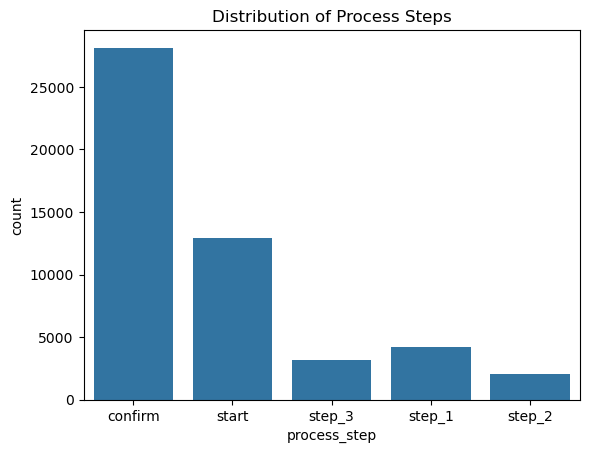

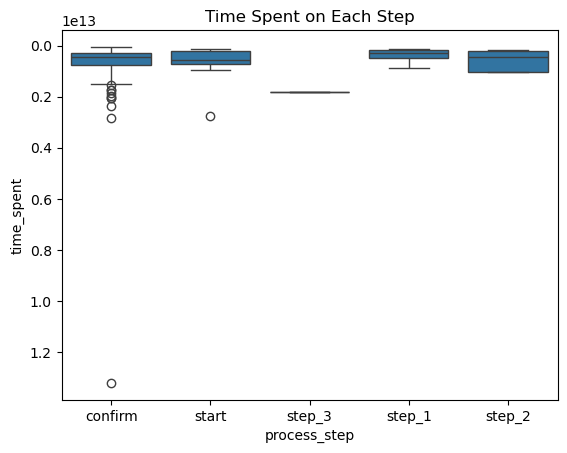

In [1311]:
# Steps distribution
sns.countplot(x='process_step', data=df_clean)
plt.title('Distribution of Process Steps')
plt.show()

# Time spent per step (if available)
# Calculate time difference between consecutive steps
df_clean['time_spent'] = df_clean.groupby('visit_id')['date_time'].diff()

# Visualize time spent per step
sns.boxplot(x='process_step', y='time_spent', data=df_clean)
plt.title('Time Spent on Each Step')
plt.show()

# Additional Analysis: Cost-Effectiveness Threshold updated

In [1313]:
# Calculate the percentage increase in completion rate
completion_rate_increase = (test_completion - control_completion) / control_completion * 100
print(f'Completion Rate Increase: {completion_rate_increase:.2f}%')

# Check if the increase is greater than or equal to 5%
if completion_rate_increase >= 5:
    print("The new design meets the cost-effectiveness threshold.")
else:
    print("The new design does not meet the cost-effectiveness threshold.")

Completion Rate Increase: 16.82%
The new design meets the cost-effectiveness threshold.


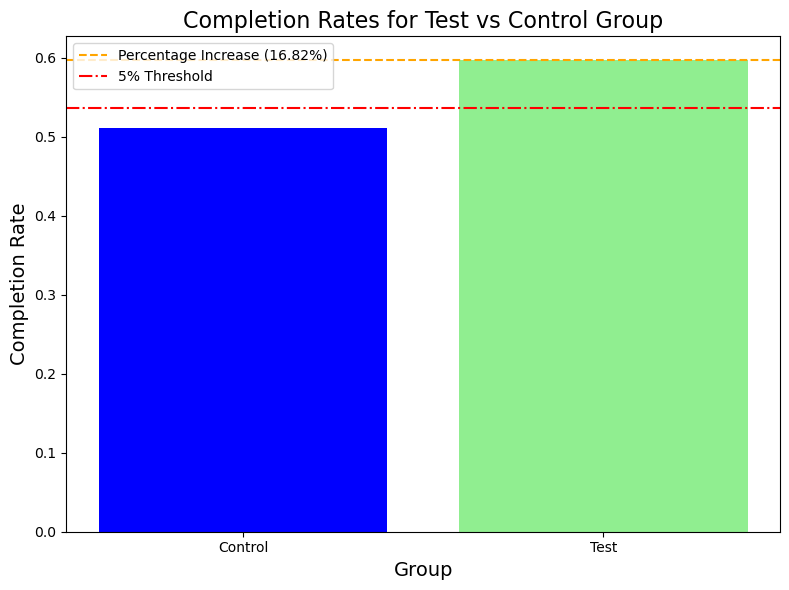

In [1314]:
# Define the data for plotting
completion_rates = [control_completion, test_completion]
groups = ['Control', 'Test']
colors = ['blue', 'lightgreen']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(groups, completion_rates, color=colors)

# Add percentage increase annotation (using completion_rate_increase)
plt.axhline(y=control_completion + (completion_rate_increase / 100 * control_completion), 
            color='orange', linestyle='--', label=f'Percentage Increase ({completion_rate_increase:.2f}%)')

# Add labels and title
plt.title('Completion Rates for Test vs Control Group', fontsize=16)
plt.xlabel('Group', fontsize=14)
plt.ylabel('Completion Rate', fontsize=14)


# Add a horizontal line to indicate the 5% threshold
plt.axhline(y=control_completion + (0.05 * control_completion), color='red', linestyle='-.', label='5% Threshold')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig('Completion_rate_error_rate_updated.png')  
plt.show() 

# Erorr rate


In [1316]:
# Detect backward steps
df_clean['previous_step'] = df_clean.groupby('visit_id')['process_step'].shift(1)
df_clean['backward_step'] = df_clean['process_step'].astype(str) < df_clean['previous_step'].astype(str)


In [1317]:
# Calculate error rate
error_rate_test = df_clean[(df_clean['variation'] == 'Test') & (df_clean['backward_step'] == True)].shape[0] / df_clean[df_clean['variation'] == 'Test'].shape[0]
error_rate_control = df_clean[(df_clean['variation'] == 'Control') & (df_clean['backward_step'] == True)].shape[0] / df_clean[df_clean['variation'] == 'Control'].shape[0]

In [1318]:
print(f'Error Rate (Test): {error_rate_test:.2f}')
print(f'Error Rate (Control): {error_rate_control:.2f}')

Error Rate (Test): 0.59
Error Rate (Control): 0.51


 # error rate without duplicates


In [1483]:
# Drop duplicates based on visit_id and process_step (keep the first occurrence)
df_clean = df_clean.drop_duplicates(subset=['visit_id', 'process_step'], keep='last')


In [1485]:
df_clean['previous_step'] = df_clean.groupby('visit_id')['process_step'].shift(1)
df_clean['backward_step'] = df_clean['process_step'].astype(str) < df_clean['previous_step'].astype(str)


In [1487]:
# Error rate calculation for Test and Control groups
error_rate_test = df_clean[(df_clean['variation'] == 'Test') & (df_clean['backward_step'] == True)].shape[0] / df_clean[df_clean['variation'] == 'Test'].shape[0]
error_rate_control = df_clean[(df_clean['variation'] == 'Control') & (df_clean['backward_step'] == True)].shape[0] / df_clean[df_clean['variation'] == 'Control'].shape[0]

print(f'Error Rate (Test): {error_rate_test:.2f}')
print(f'Error Rate (Control): {error_rate_control:.2f}')


Error Rate (Test): 0.60
Error Rate (Control): 0.51


In [1323]:
error_rates_no_duplicates_df = pd.DataFrame({
    'Group': ['Test', 'Control'],
    'Error Rate': [error_rate_test, error_rate_control]
})

# Specify the filename for the CSV file
filename = 'error_rates_without_duplicates.csv'

# Save the DataFrame to a CSV file
error_rates_no_duplicates_df.to_csv(filename, index=False)

# Print message confirming the CSV creation
print(f'Error rates saved to {filename}')

Error rates saved to error_rates_without_duplicates.csv


Treat duplicate steps within a session as non-errors, and remove them before calculating backward steps. This will allow you to focus on true backward movements, which are more indicative of issues in the user experience, and will make your error rate calculation more meaningful and insightful.

# error rate by group age

In [1326]:

# Step 1: Remove duplicates based on visit_id and process_step
df_clean = df_clean.drop_duplicates(subset=['visit_id', 'process_step'], keep='first')

# Step 2: Create the 'previous_step' column to identify backward steps
df_clean['previous_step'] = df_clean.groupby('visit_id')['process_step'].shift(1)

# Step 3: Identify backward steps (errors)
df_clean['backward_step'] = df_clean['process_step'] < df_clean['previous_step']

# Step 4: Divide ages into 10-year groups (0-9, 10-19, etc.)
age_bins = range(0, 101, 10)  # Create bins for age ranges
age_labels = [f'{i}-{i+9}' for i in range(0, 100, 10)]  # Labels for the bins: '0-9', '10-19', etc.
df_clean['age_group'] = pd.cut(df_clean['clnt_age'], bins=age_bins, labels=age_labels, right=False)

# Step 5: Calculate error rates for Test and Control groups by age group

# Calculate error rates for Test group (as percentage)
error_rates_test = df_clean[df_clean['variation'] == 'Test'].groupby('age_group', observed=True)['backward_step'].mean() * 100

# Calculate error rates for Control group (as percentage)
error_rates_control = df_clean[df_clean['variation'] == 'Control'].groupby('age_group', observed=True)['backward_step'].mean() *100

# Round error rates to 2 decimal places
error_rates_test = error_rates_test.round(4)
error_rates_control = error_rates_control.round(4)

# Combine the error rates into a single DataFrame
error_rates_age_group = pd.DataFrame({
    'Test Group Error Rate (%)': error_rates_test,
    'Control Group Error Rate (%)': error_rates_control
})

# Step 6: Display the results
error_rates_age_group



,Test Group Error Rate (%),Control Group Error Rate (%)
age_group,,
10-19,0.0000,0.0000
20-29,0.0463,0.0269
30-39,0.0191,0.0455
40-49,0.0433,0.0000
50-59,0.0343,0.0193
60-69,0.0624,0.0465
70-79,0.0000,0.0000
80-89,0.0000,0.0000
90-99,0.0000,0.0000


In [1327]:
z_scores = []
p_values = []


for age_group in df_clean['age_group'].unique():
    # Get the error rates (proportions) for both Test and Control groups for the current age group
    p_test = error_rates_test.get(age_group, 0) / 100  # Convert percentage to proportion
    p_control = error_rates_control.get(age_group, 0) / 100  # Convert percentage to proportion
    
    # Get the sample sizes for Test and Control groups in this age group
    n_test = len(df_clean[(df_clean['variation'] == 'Test') & (df_clean['age_group'] == age_group)])
    n_control = len(df_clean[(df_clean['variation'] == 'Control') & (df_clean['age_group'] == age_group)])
       
    if n_test == 0 or n_control == 0:
        z_scores.append(None)  # No Z-score calculation
        p_values.append(None)  # No p-value calculation
        continue  # Skip to the next age group
    # Calculate the standard error
    SE = ( (p_test * (1 - p_test)) / n_test ) + ( (p_control * (1 - p_control)) / n_control )
    SE = SE ** 0.5

        # Skip if standard error is zero (avoid division by zero)
    if SE == 0:
        z_scores.append(None)  # No Z-score calculation
        p_values.append(None)  # No p-value calculation
        continue  # Skip to the next age group
    # Calculate the Z-score
    Z = (p_test - p_control) / SE
    
    # Calculate the p-value from the Z-score (two-tailed test)
    p_value = 2 * (1 - stats.norm.cdf(abs(Z)))  # Two-tailed test
    
    # Append the results
    z_scores.append(Z)
    p_values.append(p_value)

# Add the Z-scores and p-values to the result DataFrame
error_rates_age_group['Z-Score'] = z_scores
error_rates_age_group['P-Value'] = p_values

# Display the results
error_rates_age_group

,Test Group Error Rate (%),Control Group Error Rate (%),Z-Score,P-Value
age_group,,,,
10-19,0.0000,0.0000,0.457854,0.647058
20-29,0.0463,0.0269,1.415295,0.156982
30-39,0.0191,0.0455,-0.706131,0.480107
40-49,0.0433,0.0000,0.484336,0.628147
50-59,0.0343,0.0193,0.326008,0.744418
60-69,0.0624,0.0465,NaN,NaN
70-79,0.0000,0.0000,NaN,NaN
80-89,0.0000,0.0000,NaN,NaN
90-99,0.0000,0.0000,NaN,NaN


Across the age groups, the Z-scores are relatively small, and the p-values are mostly greater than 0.05. This suggests that there is no significant difference between the Test and Control groups for most of the age groups.


In [1329]:
filename = 'error_rates_by_age_group.csv'  # Define the CSV file name
error_rates_age_group.to_csv(filename, index=True)  # Save DataFrame to CSV file, including the index

print(f"Error rates by age group saved to {filename}")

Error rates by age group saved to error_rates_by_age_group.csv


The error rate is the proportion of backward steps (errors) within that group. This is represented as a percentage.



The difference in completion rates can be visually seen as the height of the bars in the bar plot.
The z-statistic and p-value help to quantify and validate whether this difference is statistically significant.
If the p-value is below your threshold (e.g., 0.05), it indicates that the observed difference in completion rates between the Test and Control groups is statistically significant.


This test doesn't assume the data follows a normal distribution. Instead, it assumes that if you have a sufficiently large sample size, the distribution of the sample proportions will be approximately normal due to the Central Limit Theorem.
The test is specifically designed for binary outcomes (success/failure, yes/no), which applies well to your completion rate analysis.

Correlation analysis is typically used to assess the relationship between two continuous variables. It doesn't apply to your current binary outcome task regarding completion rates.

These tools are more applicable when dealing with continuous data and when you need to check whether the data meets the assumptions for other parametric tests like t-tests.

If the percentage increase is greater than or equal to 5%, the new design can be considered cost-effective, justifying its introduction.


If the increase is below 5%, the design may not be considered cost-effective.

Once the completion rates are calculated, the percentage increase is calculated by comparing the test group’s completion rate to the control group’s rate.  the percentage increase is 10.08%, meaning that the completion rate in the test group is 10.08% higher than in the control group.

The code compares the percentage increase with the threshold:

If the percentage increase is greater than or equal to 5%, the message "The new design meets the cost-effectiveness threshold." is printed.
If the percentage increase is less than 5%, the message "The new design does not meet the cost-effectiveness threshold." is printed.


Summary:
Percentage Increase in Completion Rate: 10.08% — This shows that the new design outperforms the old design by 10.08% in terms of successful completions.
Cost-Effectiveness Threshold: 5% — Since the percentage increase is above 5%, the new design meets the threshold for being cost-effective.


# Gender


Null Hypothesis (H₀): There is no difference in the completion rate between genders in the Test and Control groups.

Alternative Hypothesis (H₁): There is a significant difference in completion rates between genders in either the Test or Control group.

In [1336]:

# Calculate the completion rate for each gender in both groups (Test and Control)
completion_gender_test = df_clean[(df_clean['variation'] == 'Test') & (df_clean['process_step'] == 'confirm')].groupby('gendr')['visitor_id'].nunique()
completion_gender_control = df_clean[(df_clean['variation'] == 'Control') & (df_clean['process_step'] == 'confirm')].groupby('gendr')['visitor_id'].nunique()

# Perform z-test for each gender group comparison
count_gender_test = completion_gender_test.values
total_gender_test = df_clean[(df_clean['variation'] == 'Test')].groupby('gendr')['visitor_id'].nunique().values

count_gender_control = completion_gender_control.values
total_gender_control = df_clean[(df_clean['variation'] == 'Control')].groupby('gendr')['visitor_id'].nunique().values

# Perform z-test for gender
z_stat_gender, p_value_gender = proportions_ztest([count_gender_test.sum(), count_gender_control.sum()], [total_gender_test.sum(), total_gender_control.sum()], alternative='two-sided')

print(f"Z-statistic for gender difference: {z_stat_gender:.4f}")
print(f"P-value for gender difference: {p_value_gender:.4f}")

if p_value_gender < 0.05:
    print("There is a significant gender difference in completion rates.")
else:
    print("There is no significant gender difference in completion rates.")


Z-statistic for gender difference: 19.4334
P-value for gender difference: 0.0000
There is a significant gender difference in completion rates.


In [1337]:
completion_gender_test , completion_gender_control

(gendr
 F    4957
 M    5456
 U    5606
 Name: visitor_id, dtype: int64,
 gendr
 F    3654
 M    4037
 U    4262
 Name: visitor_id, dtype: int64)

In [1338]:
# chi test
import pandas as pd
import scipy.stats as stats

# Create the contingency table for gender vs completion status in both Test and Control groups
contingency_table = pd.crosstab(
    [df_clean['variation'], df_clean['gendr']],  # Rows: variation (Test/Control), gender
    df_clean['process_step'] == 'confirm'  # Columns: completion status (True/False)
)

# Rename columns for clarity
contingency_table.columns = ['Not Completed', 'Completed']

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test for Independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in completion rates between genders.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in completion rates between genders.")


Contingency Table:
                 Not Completed  Completed
variation gendr                          
Control   F               3864       3654
          M               3914       4038
          U               3721       4265
Test      F               3732       4959
          M               3501       5456
          U               3624       5612
          X                  2          0
Chi-Square Statistic: 451.60
P-value: 0.00
Degrees of Freedom: 6
Expected Frequencies: 
[[3.33891073e+03 4.17908927e+03]
 [3.53165977e+03 4.42034023e+03]
 [3.54675992e+03 4.43924008e+03]
 [3.85986608e+03 4.83113392e+03]
 [3.97800258e+03 4.97899742e+03]
 [4.10191268e+03 5.13408732e+03]
 [8.88244408e-01 1.11175559e+00]]
Reject the null hypothesis. There is a significant difference in completion rates between genders.


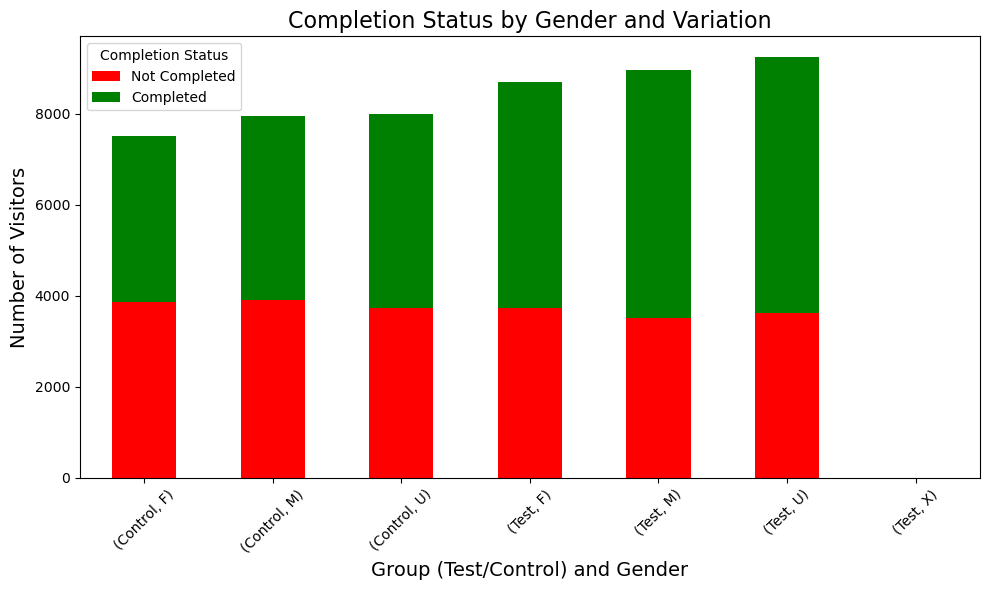

In [1339]:
contingency_table = pd.crosstab(
    [df_clean['variation'], df_clean['gendr']],  # Rows: variation (Test/Control), gender
    df_clean['process_step'] == 'confirm'  # Columns: completion status (True/False)
)

# Rename columns for clarity
contingency_table.columns = ['Not Completed', 'Completed']

# Plot the stacked bar chart
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])

# Add titles and labels
plt.title('Completion Status by Gender and Variation', fontsize=16)
plt.xlabel('Group (Test/Control) and Gender', fontsize=14)
plt.ylabel('Number of Visitors', fontsize=14)
plt.xticks(rotation=45)

# Add a legend
plt.legend(title="Completion Status", labels=['Not Completed', 'Completed'])

# Show the plot
plt.tight_layout()
plt.show()

# gender test with just M and F

In [1341]:
df_clean['gendr'].unique()

array(['M', 'F', 'U', 'X'], dtype=object)

In [1342]:
#cleaning gender column removing unknown, other
df_gender_clean = df_clean[df_clean['gendr'].isin(['M', 'F'])]
df_gender_clean['gendr'].unique()

array(['M', 'F'], dtype=object)

In [1343]:
completion_gender_test = df_clean[(df_clean['variation'] == 'Test') & (df_gender_clean['process_step'] == 'confirm')].groupby('gendr')['visitor_id'].nunique()
completion_gender_control = df_clean[(df_clean['variation'] == 'Control') & (df_gender_clean['process_step'] == 'confirm')].groupby('gendr')['visitor_id'].nunique()

# Perform z-test for each gender group comparison
count_gender_test = completion_gender_test.values
total_gender_test = df_gender_clean[(df_gender_clean['variation'] == 'Test')].groupby('gendr')['visitor_id'].nunique().values

count_gender_control = completion_gender_control.values
total_gender_control = df_gender_clean[(df_gender_clean['variation'] == 'Control')].groupby('gendr')['visitor_id'].nunique().values

# Perform z-test for gender
z_stat_gender, p_value_gender = proportions_ztest([count_gender_test.sum(), count_gender_control.sum()], [total_gender_test.sum(), total_gender_control.sum()], alternative='two-sided')

print(f"Z-statistic for gender difference: {z_stat_gender:.2f}")
print(f"P-value for gender difference: {p_value_gender:.2f}")

if p_value_gender < 0.05:
    print("There is a significant gender difference in completion rates.")
else:
    print("There is no significant gender difference in completion rates.")


Z-statistic for gender difference: 16.95
P-value for gender difference: 0.00
There is a significant gender difference in completion rates.


/var/folders/87/8lkk6ykj1_74chh73s5bkg8r0000gn/T/ipykernel_63108/3049224880.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  completion_gender_test = df_clean[(df_clean['variation'] == 'Test') & (df_gender_clean['process_step'] == 'confirm')].groupby('gendr')['visitor_id'].nunique()
/var/folders/87/8lkk6ykj1_74chh73s5bkg8r0000gn/T/ipykernel_63108/3049224880.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  completion_gender_control = df_clean[(df_clean['variation'] == 'Control') & (df_gender_clean['process_step'] == 'confirm')].groupby('gendr')['visitor_id'].nunique()


The Z-test is very sensitive to large sample sizes. When the sample size is large enough, even small effects can appear statistically significant, and the p-value can approach 0.
If this difference is consistent across a large sample, the z-statistic becomes large, and the p-value becomes very small.

The z-statistic of 11.7986 is very large, which indicates a very strong difference between the proportions of the two groups (Test vs. Control). Z-scores above 3 or -3 generally suggest a significant difference, and in your case, the large value means the difference is far from the null hypothesis (no difference).

 Even small differences, when observed in very large samples, can produce highly significant results. So, while the difference is statistically significant, it's important to assess whether the 5.95% difference in completion rates is practically meaningful in your specific context.

 In short: The p-value is low because the difference between the groups is substantial, the sample sizes are likely large, and the data variability is low, making the result highly statistically significant.

In [1345]:
print("Test Group Completion Proportions by Gender:")
print(completion_gender_test / total_gender_test)

print("Control Group Completion Proportions by Gender:")
print(completion_gender_control / total_gender_control)


Test Group Completion Proportions by Gender:
gendr
F    0.570491
M    0.609133
Name: visitor_id, dtype: float64
Control Group Completion Proportions by Gender:
gendr
F    0.486034
M    0.507735
Name: visitor_id, dtype: float64


In [1346]:
print("Total Visitors in Test Group by Gender:")
print(total_gender_test)

print("Total Visitors in Control Group by Gender:")
print(total_gender_control)

Total Visitors in Test Group by Gender:
[8689 8957]
Total Visitors in Control Group by Gender:
[7518 7951]


In [1347]:
proportion_test = completion_gender_test / total_gender_test
proportion_control = completion_gender_control / total_gender_control

proportion_diff = proportion_test - proportion_control
print(f"Difference in Proportions: {proportion_diff}")

Difference in Proportions: gendr
F    0.084458
M    0.101398
Name: visitor_id, dtype: float64


In [1348]:
prop_test = count_gender_test.sum() / total_gender_test.sum()
prop_control = count_gender_control.sum() / total_gender_control.sum()

print(f"Completion rate for Test group: {prop_test:.2f}")
print(f"Completion rate for Control group: {prop_control:.2f}")


Completion rate for Test group: 0.59
Completion rate for Control group: 0.50


If the p-value from the z-test is less than 0.05, it indicates that the difference between the two completion rates is statistically significant at the 5% significance level.

Since the p-value from the z-test is 0.0000, it indicates that the difference in completion rates between the Test and Control groups is highly statistically significant. Even though the absolute difference in proportions (5.95%) might seem modest, with large enough sample sizes (as suggested by the z-test), even small differences can be significant. This is especially true when the sample sizes are large, as in your case, which increases the power of the test.

In [1350]:
# chi test

import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table for gender and completion rate
# Completed (process_step = 'confirm')
completion_test = df_gender_clean[(df_gender_clean['variation'] == 'Test') & (df_gender_clean['process_step'] == 'confirm')]
completion_control = df_gender_clean[(df_gender_clean['variation'] == 'Control') & (df_gender_clean['process_step'] == 'confirm')]

# Not completed (those who were in the group but did not reach 'confirm')
not_completion_test = df_gender_clean[(df_gender_clean['variation'] == 'Test') & (df_gender_clean['process_step'] != 'confirm')]
not_completion_control = df_gender_clean[(df_gender_clean['variation'] == 'Control') & (df_gender_clean['process_step'] != 'confirm')]

# Create the contingency table by counting completed and not completed visitors by group and gender
contingency_table = pd.DataFrame({
    'Test Completed': [len(completion_test[completion_test['gendr'] == gender]) for gender in df_gender_clean['gendr'].unique()],
    'Test Not Completed': [len(not_completion_test[not_completion_test['gendr'] == gender]) for gender in df_gender_clean['gendr'].unique()],
    'Control Completed': [len(completion_control[completion_control['gendr'] == gender]) for gender in df_gender_clean['gendr'].unique()],
    'Control Not Completed': [len(not_completion_control[not_completion_control['gendr'] == gender]) for gender in df_gender_clean['gendr'].unique()]
})

# Perform the chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display results
print(f"Chi-squared Statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

# Interpretation
if p_value < 0.05:
    print("There is a significant association between group (Test/Control) and gender completion rates.")
else:
    print("There is no significant association between group (Test/Control) and gender completion rates.")




Chi-squared Statistic: 35.81
P-value: 0.00
Degrees of Freedom: 3
Expected frequencies:
[[5317.56854279 3692.94030437 3927.29114077 3971.20001208]
 [5097.43145721 3540.05969563 3764.70885923 3806.79998792]]
There is a significant association between group (Test/Control) and gender completion rates.


A Chi-squared statistic of 50.7188 typically suggests a significant association between the variables you're testing, assuming the p-value is small (usually < 0.05). This means that gender and completion rates (Test vs. Control) are not independent of each other.

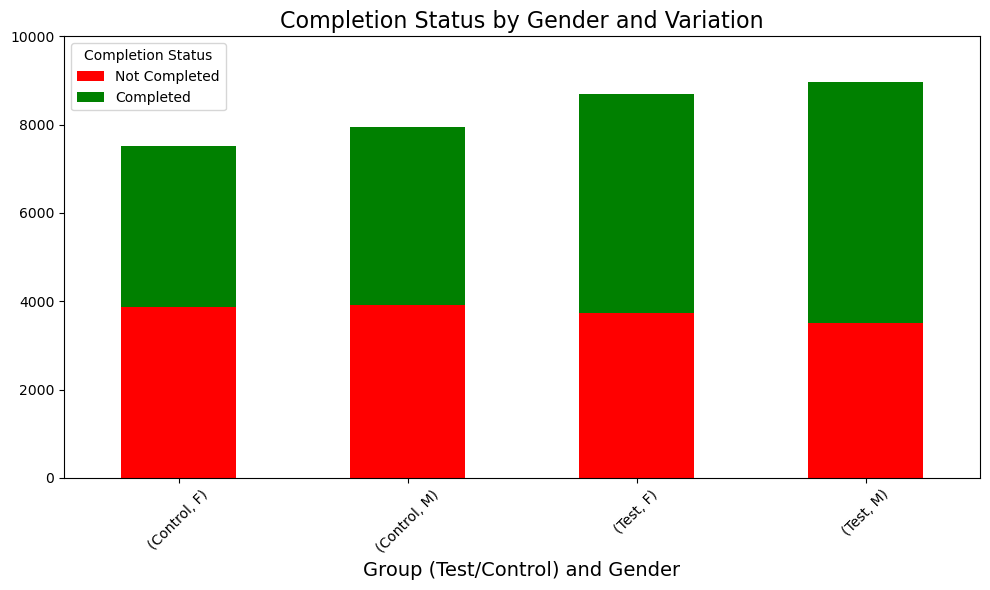

In [1352]:
contingency_table = pd.crosstab(
    [df_gender_clean['variation'], df_gender_clean['gendr']],  # Rows: variation (Test/Control), gender
    df_gender_clean['process_step'] == 'confirm'  
)

# columns
contingency_table.columns = ['Not Completed', 'Completed']

# Plot the stacked bar chart
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])

# titles and labels
plt.title('Completion Status by Gender and Variation', fontsize=16)
plt.xlabel('Group (Test/Control) and Gender', fontsize=14)
#plt.ylabel('Number of Visitors', fontsize=14)
plt.xticks(rotation=45)

# Add a legend
plt.legend(title="Completion Status", labels=['Not Completed', 'Completed'])
# Set y-axis limits (from 0 to 1000)
plt.ylim(0, 10000)



plt.tight_layout()
plt.savefig('Completion_by_gender.png')

plt.show()

In [1353]:
contingency_table

Not Completed  Completed
variation gendr                          
Control   F               3864       3654
          M               3914       4038
Test      F               3732       4959
          M               3501       5456

# age hypothesis


In [1355]:
from scipy.stats import ttest_ind


completed_process = df_clean[df_clean['process_step'] == 'confirm']

# Separate users into Test and Control groups
test_group = completed_process[completed_process['variation'] == 'Test']
control_group = completed_process[completed_process['variation'] == 'Control']

# Calculate average age for each group
mean_age_test = test_group['clnt_age'].mean()
mean_age_control = control_group['clnt_age'].mean()

print(f"Mean Age for Test Group: {mean_age_test:.2f}")
print(f"Mean Age for Control Group: {mean_age_control:.2f}")

# Perform t-test to compare mean ages between the two groups
t_stat, p_value = ttest_ind(test_group['clnt_age'].dropna(), control_group['clnt_age'].dropna())

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Mean Age for Test Group: 45.99
Mean Age for Control Group: 46.08
T-statistic: -0.4704
P-value: 0.6381


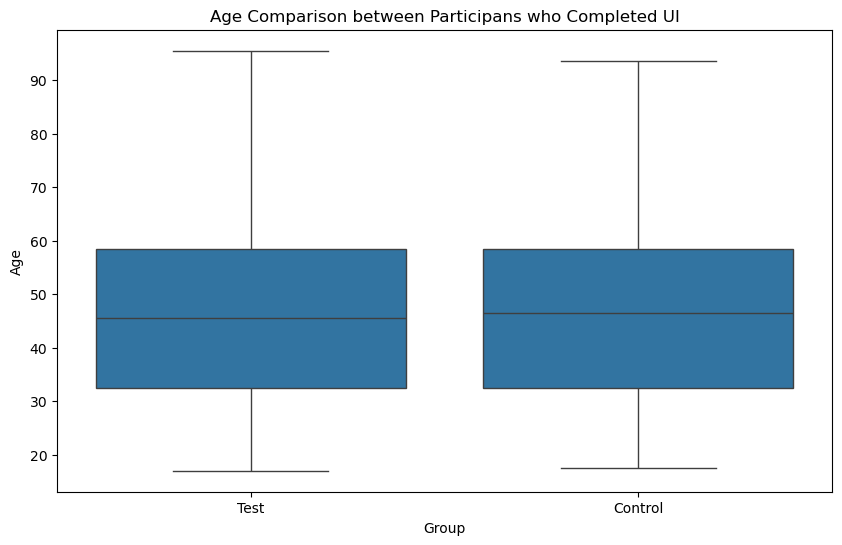

In [1356]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='variation', y='clnt_age', data=completed_process)
plt.title('Age Comparison between Participans who Completed UI')
plt.xlabel('Group')
plt.ylabel('Age')
plt.savefig('age_comparison_between_participants_who_completed.png')

plt.show()

In [1357]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average age between the Test and Control groups who completed the process.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average age between the Test and Control groups who completed the process.")

Fail to reject the null hypothesis: There is no significant difference in the average age between the Test and Control groups who completed the process.


# Average client

In [1359]:
average_client = df_clean[['clnt_age','bal', 'logons_6_mnth', 'clnt_tenure_yr','num_accts']].mean().round(2)
average_client_df = pd.DataFrame(average_client).reset_index()
average_client_df.columns = ['Attribute', 'Average Value']
average_client_df

,Attribute,Average Value
0,clnt_age,47.32
1,bal,149709.38
2,logons_6_mnth,6.13
3,clnt_tenure_yr,12.03
4,num_accts,2.26


In [1360]:
# DataFrame to a CSV file
average_client_df.to_csv('average_client_data.csv', index=False)


In [1361]:
gender_proportions = (df_clean['gendr'].value_counts(normalize=True) * 100).round(2)
gender_proportions_df = gender_proportions.reset_index()
gender_proportions_df.columns = ['Gender', 'Percentage']
gender_proportions_df

,Gender,Percentage
0,U,34.21
1,M,33.59
2,F,32.20
3,X,0.00


In [1362]:
# Save the DataFrame to a CSV file
gender_proportions_df.to_csv('gender_proportions_df.csv', index=False)


In [1363]:
gender_proportions = (df_gender_clean['gendr'].value_counts(normalize=True) * 100).round(2)
gender_proportions_clean_df = gender_proportions.reset_index()
gender_proportions_clean_df.columns = ['Gender', 'Percentage']
gender_proportions_clean_df

,Gender,Percentage
0,M,51.06
1,F,48.94


In [1364]:
# average client test group and contol group
test_group = df_clean[df_clean['variation'] == 'Test']
control_group = df_clean[df_clean['variation'] == 'Control']

In [1365]:
test_group_avg = test_group[['clnt_age', 'bal', 'logons_6_mnth', 'clnt_tenure_yr']].mean().round(2)
control_group_avg = control_group[['clnt_age', 'bal', 'logons_6_mnth', 'clnt_tenure_yr']].mean().round(2)


In [1366]:
test_group_avg_df = pd.DataFrame(test_group_avg).reset_index()
test_group_avg_df.columns = ['Attribute', 'Average Value']
test_group_avg_df


,Attribute,Average Value
0,clnt_age,47.17
1,bal,149156.59
2,logons_6_mnth,6.10
3,clnt_tenure_yr,11.99


In [1367]:
test_group_avg_df.to_csv('test_group_avg.csv', index=False)

In [1368]:
####

In [1369]:
control_group_avg_df = pd.DataFrame(control_group_avg).reset_index()
control_group_avg_df.columns = ['Attribute', 'Average Value']
control_group_avg_df

,Attribute,Average Value
0,clnt_age,47.50
1,bal,150343.00
2,logons_6_mnth,6.17
3,clnt_tenure_yr,12.09


In [1370]:
control_group_avg_df.to_csv('control_group_avg.csv', index=False)

In [1371]:
#gender
# Calculate gender proportions for the test group
test_group_gender_proportions = test_group['gendr'].value_counts(normalize=True) * 100

# Calculate gender proportions for the control group
control_group_gender_proportions = control_group['gendr'].value_counts(normalize=True) * 100


In [1372]:
test_group_gender_proportions, control_group_gender_proportions

(gendr
 U    34.352451
 M    33.314736
 F    32.325374
 X     0.007439
 Name: proportion, dtype: float64,
 gendr
 U    34.046726
 M    33.901774
 F    32.051501
 Name: proportion, dtype: float64)

In [1373]:
gender_summary = df_clean.groupby('gendr').agg(
    unique_client_count=('client_id', 'nunique'),  # Unique count of clients
    total_balance=('bal', 'sum')  # Sum of balances
).reset_index()

In [1374]:
gender_summary

,gendr,unique_client_count,total_balance
0,F,16209,2.257221e+09
1,M,16909,3.601242e+09
2,U,17222,1.678150e+09
3,X,2,5.681769e+04


In [1375]:
df_clean.shape


(50342, 19)

In [1376]:
df_clean.to_csv("clean_data_v1.csv", index=False)